In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [2]:
# Load the dataset
file_path = "csvdata.csv"  # Replace with the actual path
df = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Basic information about the dataset
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Preview:
   Unnamed: 0       City     Price  Area                         Location  \
0           0  Bangalore  30000000  3340                 JP Nagar Phase 1   
1           1  Bangalore   7888000  1045       Dasarahalli on Tumkur Road   
2           2  Bangalore   4866000  1179  Kannur on Thanisandra Main Road   
3           3  Bangalore   8358000  1675                     Doddanekundi   
4           4  Bangalore   6845000  1670                          Kengeri   

   No. of Bedrooms  
0                4  
1                2  
2                2  
3                3  
4                3  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29135 entries, 0 to 29134
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       29135 non-null  int64 
 1   City             29135 non-null  object
 2   Price            29135 non-null  int64 
 3   Area             29135 non-null  int64 
 

In [3]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         Unnamed: 0         Price          Area  No. of Bedrooms
count  29135.000000  2.913500e+04  29135.000000     29135.000000
mean    3058.808238  1.195267e+07   1301.816475         2.421074
std     1923.174050  2.387647e+07    767.862339         0.821016
min        0.000000  2.000000e+06    200.000000         1.000000
25%     1431.000000  4.179999e+06    870.000000         2.000000
50%     2891.000000  6.884999e+06   1137.000000         2.000000
75%     4539.500000  1.230000e+07   1504.000000         3.000000
max     7718.000000  8.546000e+08  16000.000000         9.000000


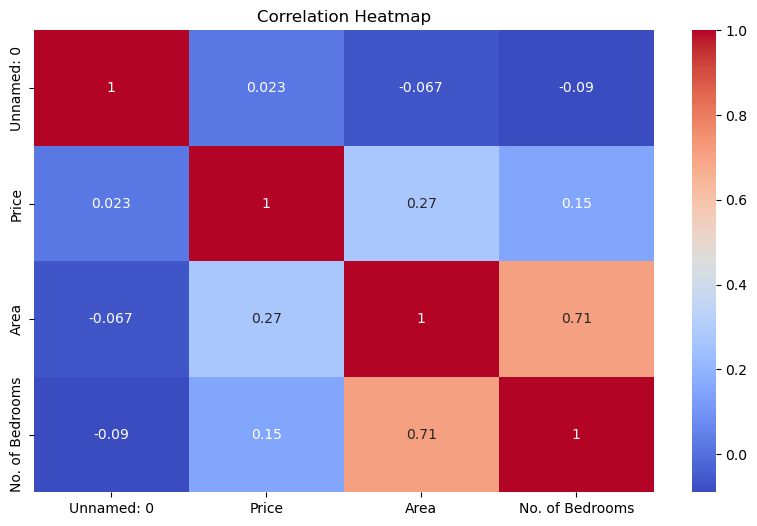

In [4]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Unnamed: 0         0
City               0
Price              0
Area               0
Location           0
No. of Bedrooms    0
dtype: int64


In [6]:
df_cleaned = df.dropna()

In [7]:
# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)
print("Dataset after encoding:")
print(df_encoded.head())


Categorical columns: Index(['City', 'Location'], dtype='object')
Dataset after encoding:
   Unnamed: 0     Price  Area  No. of Bedrooms  City_Chennai  City_Delhi  \
0           0  30000000  3340                4         False       False   
1           1   7888000  1045                2         False       False   
2           2   4866000  1179                2         False       False   
3           3   8358000  1675                3         False       False   
4           4   6845000  1670                3         False       False   

   City_Hyderabad  City_Kolkata  City_Mumbai  Location_10 Sector Dwarka  ...  \
0           False         False        False                      False  ...   
1           False         False        False                      False  ...   
2           False         False        False                      False  ...   
3           False         False        False                      False  ...   
4           False         False        False          

In [8]:
# Define target and features
target_column = 'Price'  
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Confirm shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (29135, 1783)
Target shape: (29135,)


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (23308, 1783)
Testing set size: (5827, 1783)


In [10]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform the training data; transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for interpretability if needed
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


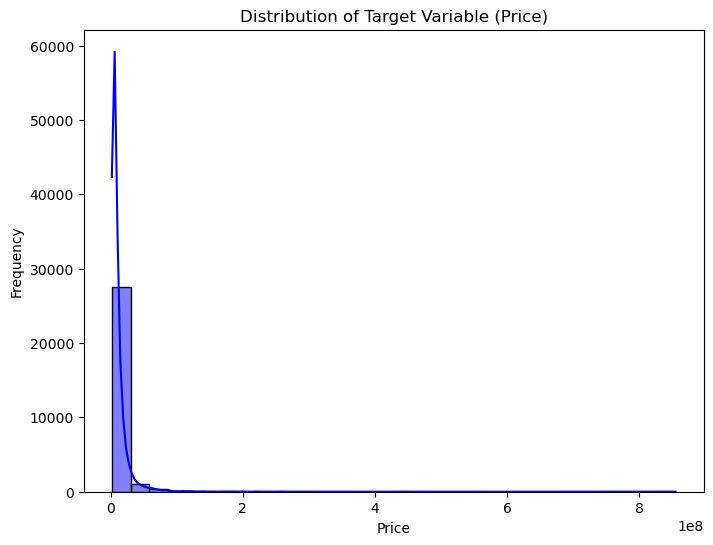

In [11]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, bins=30, color='blue')
plt.title("Distribution of Target Variable (Price)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [12]:
# Correlation matrix for the dataset
correlation_matrix = df_encoded.corr()

# Correlation with the target column
target_corr = correlation_matrix[target_column].sort_values(ascending=False)
print("\nFeatures most correlated with the target:")
print(target_corr)



Features most correlated with the target:
Price                       1.000000
Area                        0.268954
Location_Sunder Nagar       0.206768
Location_Greater Kailash    0.181330
No. of Bedrooms             0.150691
                              ...   
Location_Dwarka Mor        -0.027889
Location_Uttam Nagar       -0.028874
Location_Noida             -0.041786
City_Chennai               -0.052663
City_Kolkata               -0.088741
Name: Price, Length: 1784, dtype: float64


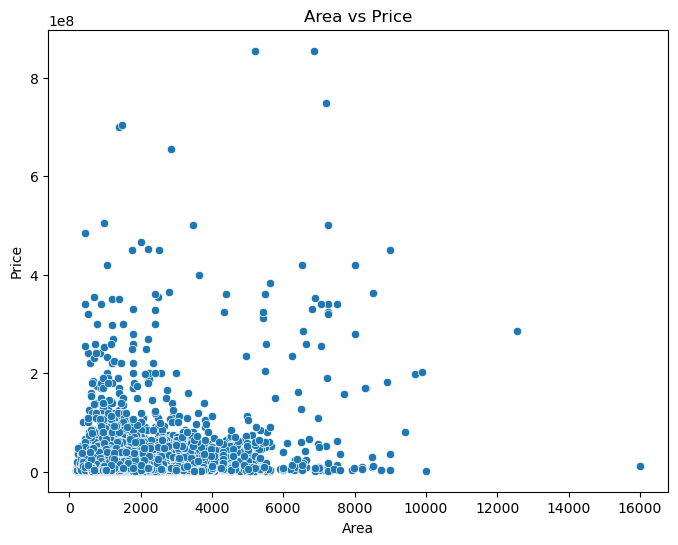

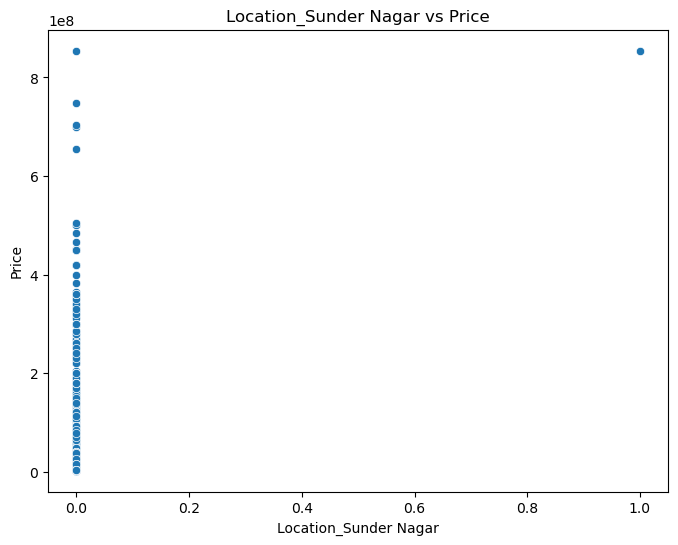

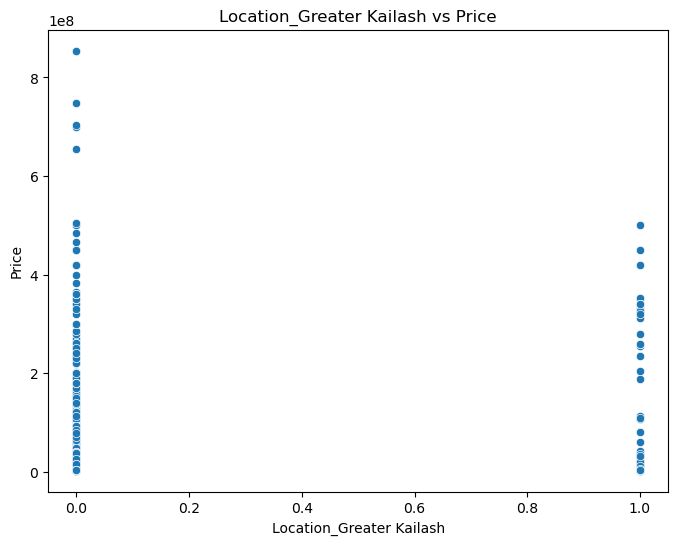

In [13]:
# Scatter plots for top correlated features
top_features = target_corr.index[1:4]  # Top 3 features excluding the target
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_encoded, x=feature, y=target_column)
    plt.title(f"{feature} vs {target_column}")
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.show()


In [16]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_pred_train = rf_model.predict(X_train_scaled)
rf_pred_test = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Model Evaluation:")
print("Train RMSE:", mean_squared_error(y_train, rf_pred_train, squared=False))
print("Test RMSE:", mean_squared_error(y_test, rf_pred_test, squared=False))
print("Train R^2:", r2_score(y_train, rf_pred_train))
print("Test R^2:", r2_score(y_test, rf_pred_test))


Random Forest Model Evaluation:
Train RMSE: 8122514.319168232
Test RMSE: 25477131.963960353
Train R^2: 0.8747957298319117
Test R^2: 0.125487935623664


/opt/anaconda3/envs/summative/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/summative/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
# Cross-validation scores
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean CV RMSE:", -cv_scores.mean())


Cross-Validation RMSE Scores: [25443554.46946107 17973207.83163264 22841718.87899349 18969311.87002755
 22271933.37751754]
Mean CV RMSE: 21499945.285526462
